## Visualizing BERT Layer Activations
In this mini-project, we delve into the inner workings of the BERT model by visualizing the activations within its layers.

Using a pre-trained BERT model, we processed an input sequence to extract and analyze the model's hidden states. Specifically, we focused on the second to last layer's activations, as it is one of the deepest layers in the network and carries substantial contextual information.

By translating these high-dimensional activation patterns into a visual heatmap, we gained insights into the model's representation of the input sequence. Each row in our visualization corresponds to the complex patterns learned by a single hidden unit across different tokens, revealing how the model's neurons react to various linguistic features.

In [9]:
import torch
import numpy
import matplotlib.pyplot as plt
from transformers import BertModel, BertTokenizer

In [25]:
# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Encode text
text = "[CLS] How would you name a legendary underground anonymous rapper in the AI age ? [SEP] ML DOOM [SEP]"
tokenized_text = tokenizer.tokenize(text)

In [26]:
# Prepare the tokenized input text to be in the correct format and data type
# that the BERT model can accept for processing.

# Convert token to vocabulary indices
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
segments_ids = [1] * len(tokenized_text)

# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [4]:
# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased')

# Set the model in evaluation mode to deactivate the DropOut modules
model.eval()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [27]:
# Predict hidden states features for each layer
with torch.no_grad():
    # See the models docstrings for the detail of the inputs
    outputs = model(tokens_tensor, token_type_ids=segments_tensors, output_hidden_states=True)
    # Transformers models always output tuples.
    # See the models docstrings for the detail of all the outputs
    # In our case, the first element is the hidden state of the last layer of the Bert model
    hidden_states = outputs.hidden_states

In [28]:
# Let's print out the second to last layer
second_to_last_layer = hidden_states[-2]
# Output should be: (batch_size, sequence_length, model_hidden_dimension)
print('Second to last layer shape:', second_to_last_layer.shape)

Second to last layer shape: torch.Size([1, 19, 768])


In [29]:
# Remove the batch dimension since it's size 1 and transpose to have hidden units as columns
second_to_last_layer = second_to_last_layer.squeeze(0).T
# Output should be: (model_hidden_dimension, sequence_length)
print('Second to last layer shape after squeeze and transpose:', second_to_last_layer.shape)


Second to last layer shape after squeeze and transpose: torch.Size([768, 19])


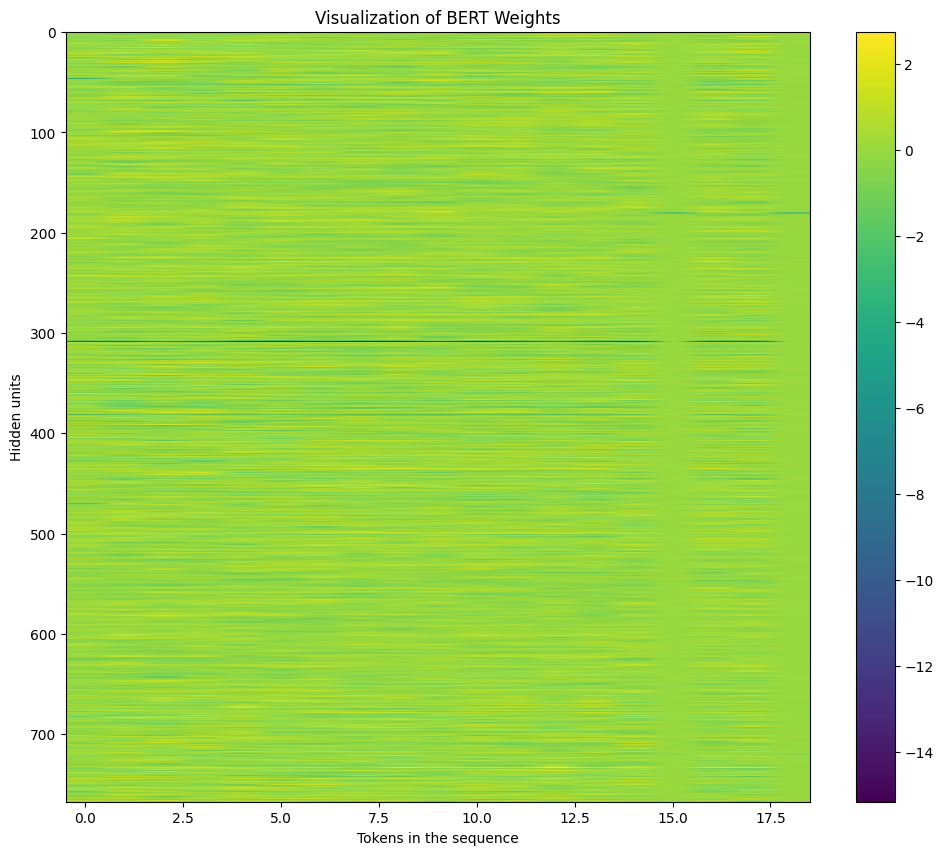

In [30]:
# Use plt.imshow to visualize the weights matrix as an image
plt.figure(figsize=(12,10))
plt.title("Visualization of BERT Weights")
plt.imshow(second_to_last_layer, cmap='viridis', aspect='auto')
plt.xlabel("Tokens in the sequence")
plt.ylabel("Hidden units")
plt.colorbar()
plt.show()

This plot is a result of visualizing the activations from the BERT model's second to last hidden layer for each token in the input sequence.

Here's how to interpret this visualization:

**Y-Axis (Hidden units)**: Each horizontal line represents one of the hidden units in the second to last hidden layer of BERT.

**X-Axis (Tokens in the sequence)**: Each vertical line in the plot corresponds to one of the tokens in your input sequence. Since BERT-base has 768 hidden units, you're seeing a very narrow strip as there is only one token being represented across all hidden units.

**Color**: The color indicates the activation level of each hidden unit for the token. Yellow-Green represents activations closer to zero or slightly positive.
Dark Blue-Purple represents significantly negative activations. The scale in the color bar of the heatmap is determined by the range of activation values in the data being visualized. If the scale is non-symmetric around 0, this suggests that the activations for this particular set of embeddings are not centered around 0 and have a wider range on the negative side.